## Import Libraries

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2d
from scipy.ndimage import gaussian_filter

img shape: (600, 540)


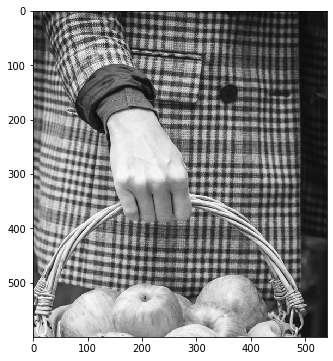

In [2]:
img_raw = np.array(imread('apples.jpg')).astype(np.float64) / 255.
img = np.mean(img_raw, axis=2)
img = img[0:600, 100:900]
print("img shape:", img.shape)
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
plt.show()

## Load blur kernel

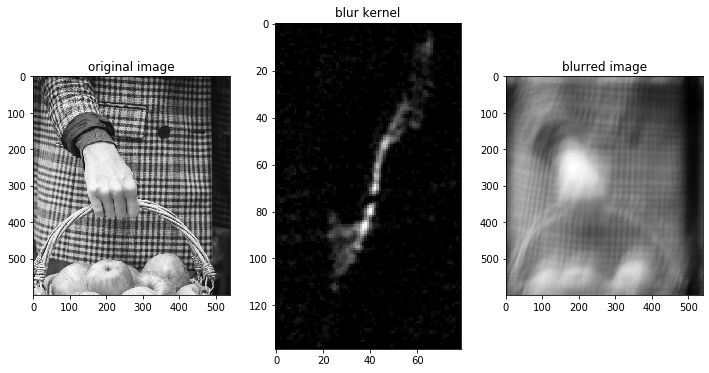

In [3]:
k = np.float32(imread('blur_kernel.png', as_gray=True))
k = k / np.sum(k)
img_blur = conv2d(img, k, mode='same', boundary='wrap') # slightly expensive due to large k size

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(k, cmap='gray')
plt.title('blur kernel')
plt.subplot(1, 3, 3)
plt.imshow(img_blur, cmap='gray')
plt.title('blurred image')
plt.show()

## Kernpad

In [4]:
from lib import kernpad
# you need to implement your own

Text(0.5, 1.0, 'Shifted kernel')

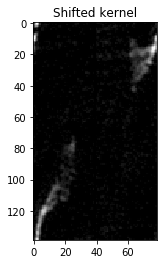

In [5]:
k_shift = kernpad(k, img.shape)
plt.imshow(kernpad(k, k.shape), cmap='gray')
plt.title('Shifted kernel')

## Convert to Fourier Domain

In [6]:
# Derivative kernel
kx = np.array([[1.,0,-1.],
               [2.,0,-2.],
               [1.,0,-1.]])
ky = np.array([[1.,2.,1.],
               [0.,0.,0.],
               [-1.,-2.,-1.]])

# Gaussian derivative
gx = gaussian_filter(kx, sigma=1, mode='wrap')
gy = gaussian_filter(ky, sigma=1, mode='wrap')

# Fourier transform of circular padded kernels
size = img.shape
k_fft = np.fft.fft2(kernpad(k, size))
gx_fft = np.fft.fft2(kernpad(gx, size))
gy_fft = np.fft.fft2(kernpad(gy, size))

# Fourier transform of blurry image
blur_fft = np.fft.fft2(img_blur)

## Visualize Magnitude and Phase of blur kernel

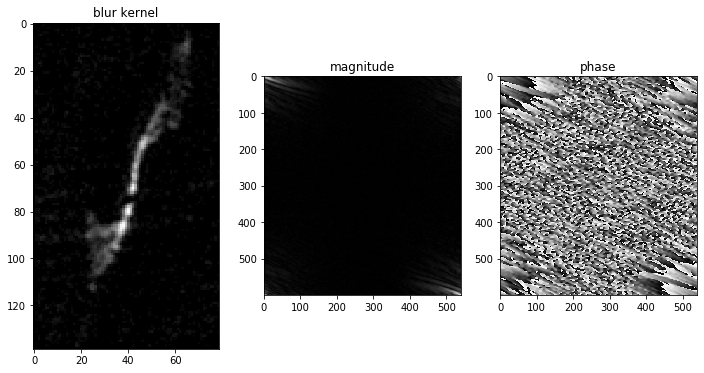

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(k, cmap='gray')
plt.title('blur kernel')

plt.subplot(1, 3, 2)
mag = np.log10(np.abs(k_fft)+1)
mag = mag / np.max(mag)
plt.imshow(mag, cmap='gray')
plt.title('magnitude')

plt.subplot(1, 3, 3)
phase = np.angle(k_fft)
plt.imshow(phase / np.max(phase), cmap='gray')
plt.title('phase')
plt.show()

## Deblur

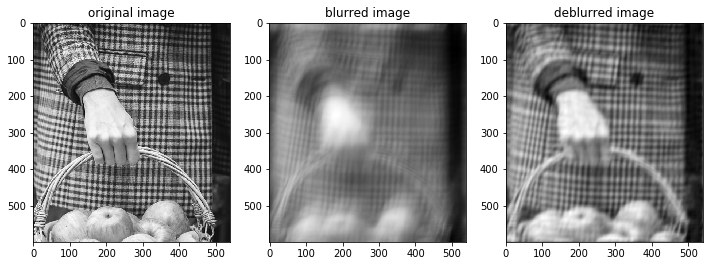

In [8]:
lmd = 0.1

# Deblur in Fourier domain
numerator = np.conj(k_fft)
denominator = np.abs(k_fft)**2 + lmd * (np.abs(gx_fft)**2 + np.abs(gy_fft)**2)

pred_fft = numerator/denominator * blur_fft
pred = np.real(np.fft.ifft2(pred_fft))

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('blurred image')
plt.subplot(1, 3, 3)
plt.imshow(pred, cmap='gray')
plt.title('deblurred image')
plt.show()